# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './data/train.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(train['features'])

# TODO: Number of testing examples.
n_test = len(test['features'])

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'][0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

2


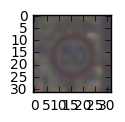

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
#simple and radom visulization
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

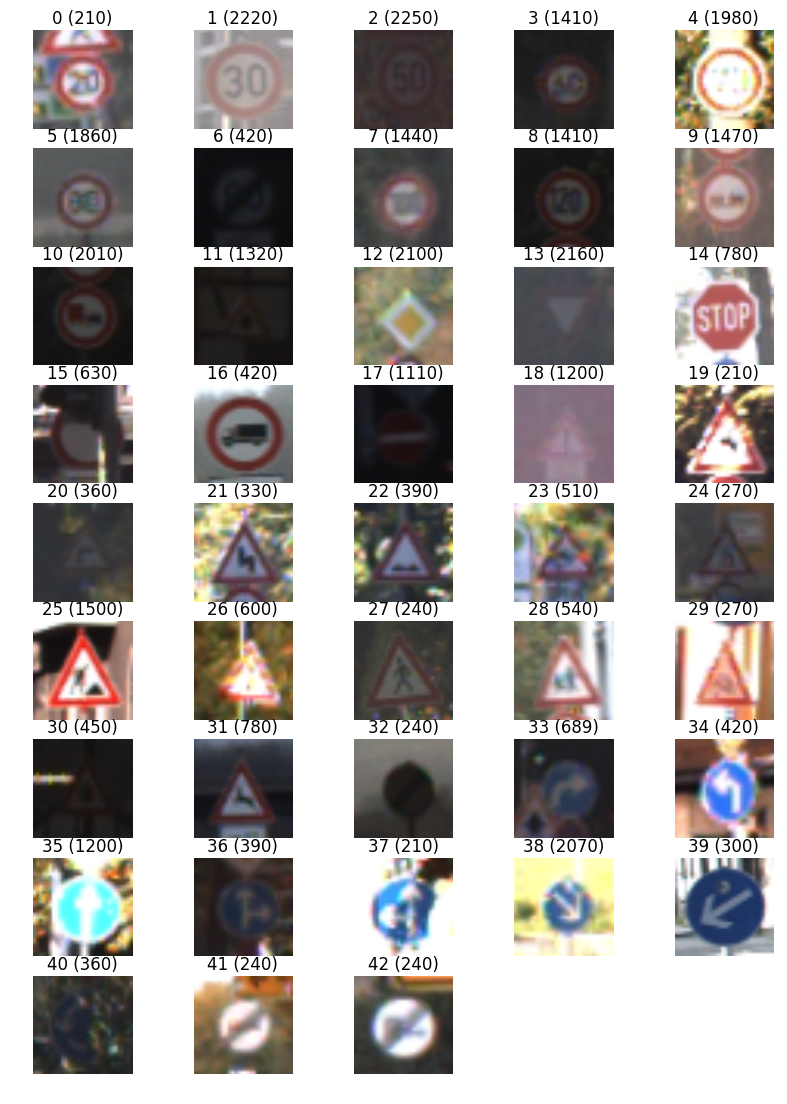

In [4]:
#show the first image in each label, also the number of photos in each label 
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 15))
sample_number=[]

for label in range(0, n_classes):
    plt.subplot(10, 5, label+1)
    x_image_show = X_train[y_train == label]
    plt.imshow(x_image_show[0, :, :, :]) 
    plt.title("{0} ({1})".format(label, y_train.tolist().count(label)))
    plt.axis('off')
    sample_number.append(len(x_image_show))
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#Step 1: Shuffle training data 
X_train, y_train = shuffle(X_train, y_train)

#Step 2: MinMax training and testing data
X_train_minmax = preprocessing.MinMaxScaler(X_train)
X_test_minmax = preprocessing.MinMaxScaler(X_test)

#Step 3: Split training data into training data and validation data
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20)

print (X_train.shape)
print (y_train.shape)
print (X_validation.shape)
print (y_validation.shape)

(31367, 32, 32, 3)
(31367,)
(7842, 32, 32, 3)
(7842,)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
1. I shuffle the data to prevent high bias
2. I chose MinMax Scaler to preprocess the to have smaller standard deviations, which can suppress the effect of outliers
3. I split the data into training and testing data, and further split training data into training and validation data  in order to tune the hyper parameters of the model, and evaluate the performance. 

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

Answer:
I use the "80/20" rule to setup training, validation and testing data for my model since it's a common practice and the number of training examples is 39209 which is large enough to apply this rule.
I got 31367 training data, 7842 validation data and 12630 testing data.
I'm using LeNet model for this project.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I used LeNet model as suggested in the class. 

It starts with the first Convolutional layer with Relu function and Max pooling layer, and the 2nd Convolutional layer with Relu function and Max pooling layer. It followed by first Fully connected layer with Relu function, then 2nd Fully connected layer with Relu function, and 3rd (final) Fully connected layer with Relu function. 

After the logits is generated, one hot encoding is applied. At learning rate 0.001, it uses softmax and Adam Optimizer to update the weights and biases in order to improve accuracy. The final step is to use validation data to test after each epoch, and save the model.  

In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    #mean
    mu = 0
    #standard deviation
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [10]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet_jan_17_a')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.740

EPOCH 2 ...
Validation Accuracy = 0.879

EPOCH 3 ...
Validation Accuracy = 0.916

EPOCH 4 ...
Validation Accuracy = 0.921

EPOCH 5 ...
Validation Accuracy = 0.943

EPOCH 6 ...
Validation Accuracy = 0.950

EPOCH 7 ...
Validation Accuracy = 0.958

EPOCH 8 ...
Validation Accuracy = 0.954

EPOCH 9 ...
Validation Accuracy = 0.966

EPOCH 10 ...
Validation Accuracy = 0.959

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Type of optimizer: Adam Optimizer

Batch size: 128

Epochs: 10

learning rate: 0.001

How to train the model: 

Layer 1: 
- Convolutional Layer, takes 32x32 images as input, 5x5 kernal, stride of 1, depth of 6, VALID padding, 28x28x6 as output 
- Add Relu non-linear function
- Max Pooling Layer, takes 28x28x6 as input, 2x2 kernal, stride of 2, depth of 6, VALID padding, 14x14x6 as output

Layer 2: 
- 2nd Convolutional Layer, takes 14x14 images, 5x5 kernal, stride of 1, depth of 16, VALID padding, 10x10x16 as output
- Add Relu non-linear function
- Max Pooling Layer, takes 10x10x6 as input, 2x2 kernal, stride of 2, depth of 16, VALID padding, 5x5x16 as output 

After layer 2, flattern 5x5x16 input into output of 400

Layer 3:
- Fully connected layer, takes 400 as input, 120 as output. This layer takes all neurons in the previous layers and connects it to every single neuron
- Add Relu non-linear function

Layer 4: 
- Fully connected layer, takes 120 as input, 84 as output. This layer takes all neurons in the previous layers and connects it to every single neuron
- Add Relu non-linear function

Layer 5 (final layer): 
- Fully connected layer, takes 84 as input, 10 as output. This layer takes all neurons in the previous layers and connects it to every single neuron
- Add Relu non-linear function

After the logits is generated, one hot encoding is applied. At learning rate 0.001, it uses softmax and Adam Optimizer to update the weights and biases in order to improve accuracy. The final step is to use validation data to test after each epoch, and save the model.

The final accuracy is 0.959

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I used LeNet as the class suggested. It worked well with normal CPU and training time is short. The accuracy is 0.959 which is very good. A side note, for the Step 3 task, I picked 5 random traffic sign pictures from Internet and ran them through the model, however none of them were classified correctly (Therefore I didn't included in this notebook). Then I specifically found 5 German traffic sign pictures from Internet and ran again, glad I got all 5 pictures successfully classified. I think this model needs improvement if we are running additional data. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(5, 32, 32, 3)


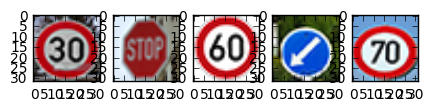

In [46]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
%matplotlib inline

new_images_dict = []
my_images = os.listdir("images_add_jan17/")
num_images = len(my_images)
label = 0
for image_file in my_images:
    label = label + 1
    plt.subplot(2, 6, label+1)
    #To skip hidden files
    if not image_file.startswith('.'):
        image = mpimg.imread('images_add_jan17/' + image_file)
        plt.imshow(image)
        new_images_dict.append(image)

print (np.array(new_images_dict).shape)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I took 2 tries to find the right pictures. First time I found 5 random traffic sign pictures from the Internet. However none of them were correctly classified (I didn't include them in the notebook). One of them was American "keep left" sign which was yellow and black. Since the German "keep left" sign is blue and white, the model wasn't able to recognize it. For humans we understand both of them by looking at where the arrow points at, however the neural network is not smart enough to figure out the pattern. 

Therefore I specifically found 5 German traffic signs. I chose the pictures which were clear to spot the traffic sign from the background, high resolution and high contrast. All of them were successfully classified. 4 of them got probability of 1, the other one got probability of 0.99. 

In [43]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

softmax = tf.nn.softmax(logits)
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('lenet_jan_17_a.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    softmax_result = sess.run(softmax, feed_dict={x: new_images_dict})    
    top_3_score = tf.nn.top_k(softmax_result, k=3)
    prediction_top_3 = sess.run(top_3_score)
    
    print(prediction_top_3)

TopKV2(values=array([[  1.00000000e+00,   2.08250208e-15,   8.76647911e-25],
       [  9.99986172e-01,   1.37946554e-05,   1.89670608e-08],
       [  1.00000000e+00,   2.24165714e-10,   9.33182351e-12],
       [  1.00000000e+00,   1.65621419e-10,   1.22998350e-30],
       [  1.00000000e+00,   5.29513109e-12,   2.22714540e-14]], dtype=float32), indices=array([[ 1,  0, 40],
       [14,  0,  1],
       [ 3,  1,  2],
       [39, 33, 40],
       [ 4,  1,  0]], dtype=int32))


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** 
The model performed equally well on captured pictures since the pictures are German traffic signs. Below is the visualization of each prediction. 

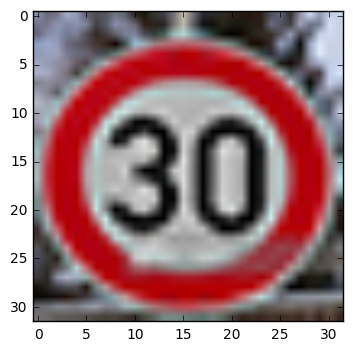

In [47]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
# print first image
plt.imshow(new_images_dict[0])
#This is speed limit 30 sign, label 1, matches prediction [1,  0, 40]. 

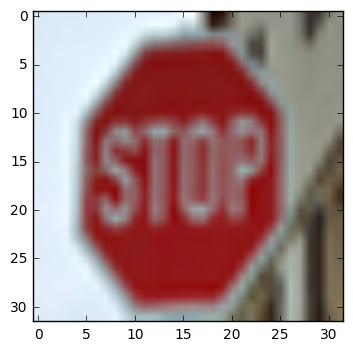

In [48]:
#print 2nd image
plt.imshow(new_images_dict[1])
#This is a stop sign, label 14, matches prediction [14,  0,  1]. 

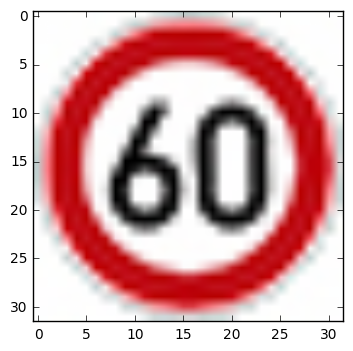

In [49]:
#print 3rd image
plt.imshow(new_images_dict[2])
#This is a speed limit 60 sign, label 3, matches prediction [3,  1,  2]. 

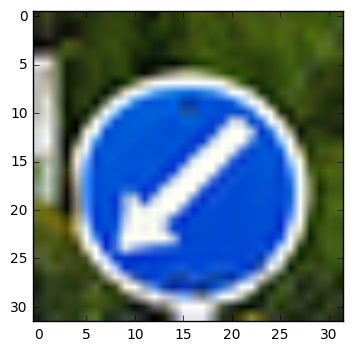

In [50]:
#print 4th image
plt.imshow(new_images_dict[3])
#This is a keep left sign, label 39, matches prediction [39, 33, 40]. 

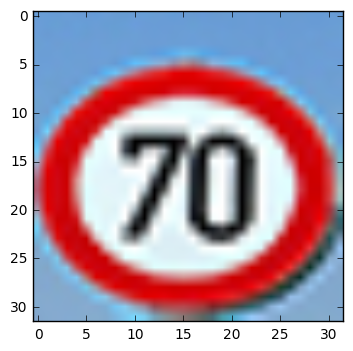

In [51]:
#print 5th image
plt.imshow(new_images_dict[4])
#This is a speed limit 70 sign, label 4, matches prediction [4,  1,  0]

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
The certainty of top 3 predictions of the 5 pictures are: 

Picture 1 - speed limit 30 sign. The certainty is 1. The matching prediction is label 1 which is correct. The second prediction label 0 only has 0.000000000000002 certainty which is very low.  
[  1.00000000e+00,   2.08250208e-15,   8.76647911e-25],
       
Picture 2 - stop sign. The certainty is 0.99. The matching prediction is label 14 which is correct. The second prediction label 0 only has 0.00001 certainty which is very low. 
[  9.99986172e-01,   1.37946554e-05,   1.89670608e-08],

Picture 3 - speed limit 60 sign. The certainty is 1. The matching prediction is label 3 which is correct. The second prediction label 1 only has 0.0000000002 certainty which is very low. 
[  1.00000000e+00,   2.24165714e-10,   9.33182351e-12],

Picture 4 - keep left sign. The certainty is 1. The matching prediction is label 39 which is correct. The second prediction label 33 only has 0.0000000001 which is very low. 
[  1.00000000e+00,   1.65621419e-10,   1.22998350e-30],

Picture 5 - speed limit 70 sign. The certainty is 1. The matching prediction is label 4 which is correct. The second prediction label 1 only has 0.000000000005 which is very low. 
[  1.00000000e+00,   5.29513109e-12,   2.22714540e-14]

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.